In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import database.fetch as fetch

In [3]:
nltk_acc = fetch.fetch_nltk_acc()#.drop("neuCount").drop(columns=["neuCount"])
flair_acc = fetch.fetch_flair_acc()#.drop("neuCount").drop(columns=["neuCount"])

In [27]:
import matplotlib.pyplot as plt
import six
import numpy as np
def render_mpl_table2(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, cell_width_custom=None, **kwargs):
    ## taken from https://stackoverflow.com/questions/26678467/export-a-pandas-dataframe-as-a-table-image

    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    cellDict = mpl_table.get_celld()
    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 and k[1]==0:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
        elif k[0] == 0 or k[1] == 0 or k[1]< header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
        if cell_width_custom:
            cell.set_width(cell_width_custom[k[1]])
    #https://stackoverflow.com/questions/12490596/matplotlib-table-individual-column-width
    #cellDict = mpl_table.get_celld()
    #for k, cell in
    #cellDict[(0, 0)].set_width(0.1)
    #if cell_width_custom:
    #        cell.set_width(cell_width_custom[k])
    return fig, ax

Both the nltk and flair models produce sentiment predictions on a scale from negative one to positive one, coresponding with the intensity of the predicted sentiment. However, the testing data from sentiment140 contained no neutrally labeled tweets. The Flair model was successful in not predicting neutral sentiment values for any of the positive or negatively labeled tweets. The nltk model, however, mislabeled 3,136 tweets as neutral.


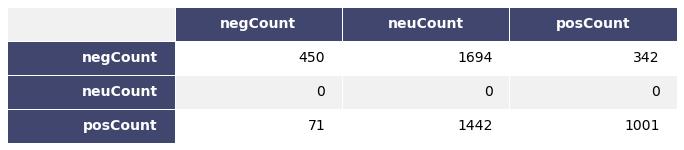

In [28]:
import common.misc as misc
df = nltk_acc
df[''] = df.index
cols = df.columns.tolist()
cols = [cols[-1]] + cols[:-1]
df = df[cols]
fig, ax = render_mpl_table2(df, header_columns=0, font_size=14)
#fig.savefig("writeup\\nltk_acc.png")

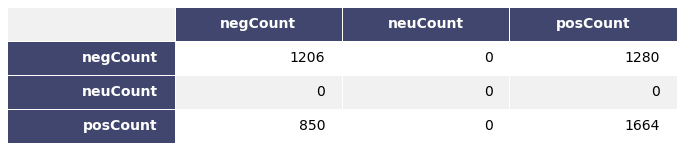

In [29]:
import common.misc as misc
df = flair_acc
df[''] = df.index
cols = df.columns.tolist()
cols = [cols[-1]] + cols[:-1]
df = df[cols]
fig, ax = render_mpl_table2(df, header_columns=0, font_size=14)
fig.savefig("writeup\\flair_acc.png")

In [34]:
# Show accuracy
def plot_false_true(df, title):
    #fig = plt.figure()
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8, 4))
    data = [df.loc['negCount']['negCount'], df.loc['negCount']['posCount'], df.loc['posCount']['posCount'], df.loc['posCount']['negCount']]
    #ax = fig.add_axes([0,0,1,1])
    labels = ["true negative", "false negative", "true positive", "false positive"]
    ax.bar(labels, data, color=['g', 'r', 'g', 'r'])
    #plt.title(title)#"NLTK Sentiment Prediction on Sentiment140 Data set (sample=5000)")
    ax.set_title(title)
    ax.set_ylabel("count")
    plt.show()
    return fig, ax

def plot_false_true2(df, title):
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8, 4))
    #fig = plt.figure()
    data = [df.loc['negCount']['negCount'], 
            df.loc['negCount']['posCount'] + df.loc['negCount']['neuCount'],
            df.loc['posCount']['posCount'],
            df.loc['posCount']['negCount'] + df.loc['posCount']['neuCount']]
    #ax = fig.add_axes([0,0,1,1])
    labels = ["true negative", "false negative", "true positive", "false positive"]
    ax.bar(labels, data, color=['g', 'r', 'g', 'r'])
    #plt.title(title)#"NLTK Sentiment Prediction on Sentiment140 Data set (sample=5000)")
    ax.set_title(title)
    ax.set_ylabel("count")
    plt.show()
    return fig, ax



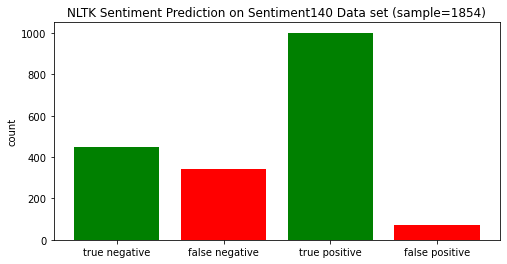

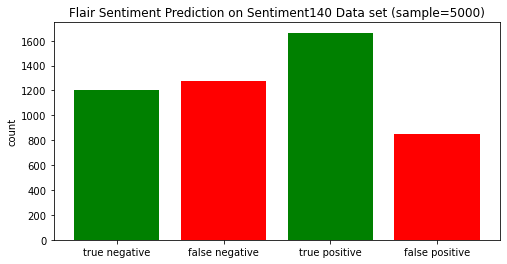

In [35]:
fig,ax = plot_false_true(nltk_acc, "NLTK Sentiment Prediction on Sentiment140 Data set (sample=1854)" )
#fig=ax.get_figure()
fig.savefig('writeup\\nltk_prediction_validate_hist.png') 
fig,ax = plot_false_true(flair_acc, "Flair Sentiment Prediction on Sentiment140 Data set (sample=5000)")
#fig=ax.get_figure()
fig.savefig('writeup\\flair_prediction_validate_hist.png')

Looking at the incredibly small false positive rate for the nltk model is misleading because of the lack of inclusion of neutral tweets. If we include false positives and negatives with neutral labels the flair remains the same. The nltk model is as below.

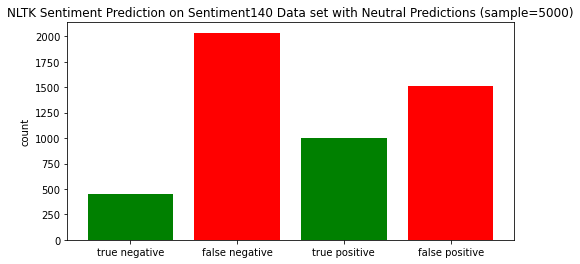

In [36]:
fig, ax = plot_false_true2(nltk_acc,  "NLTK Sentiment Prediction on Sentiment140 Data set with Neutral Predictions (sample=5000)")
fig.savefig("writeup\\nltk_prediction_validate_hist_w_neutral.png")

In [29]:

def plot_sentiment_count(tweet_df, model, bins, title):
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib.ticker as ticker
    import common.dates as dates


    
    data = tweet_df.loc[:,model] # = dates.group_data(index_df, ['close'], method='lastValue', group=group)
    #index_df = index_df.set_index('datetime', drop=False)
    #remove NaT values
    #index_df = index_df[index_df['datetime'].notnull()]

    fig, ax = plt.subplots(ncols=1, figsize=(8, 4))
    
    
    #date = index_df['datetime'].astype('O')
    #index_df['close'] = index_df['close'].pct_change().dropna()
    #N = len(index_df)
    #ind = np.arange(N)  # the evenly spaced plot indices
    ax.hist(data, bins=bins)
    #ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
    ax.set_title(title + " (Bins=" + str(bins) +")")
    #print(index_df.head())
    ax.set_xlabel("Sentiment")
    ax.set_ylabel("Count")
    #fig.autofmt_xdate()
    
    plt.show()

# NLTK predictions on financial tweets

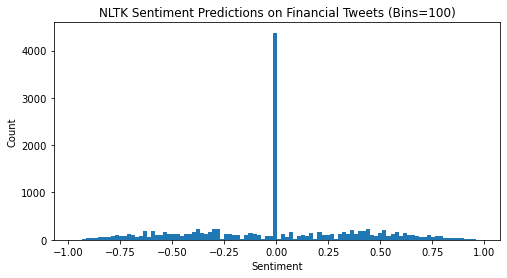

In [35]:
import database.fetch as fetch
tweet_df = fetch.fetch_tweets().drop(columns="tweet_id")
bins = 100
model = 'nltk'
plot_sentiment_count(tweet_df, model, bins, "NLTK Sentiment Predictions on Financial Tweets")

C:\Users\jake\Anaconda3\envs\sproj2\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\jake\Anaconda3\envs\sproj2\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


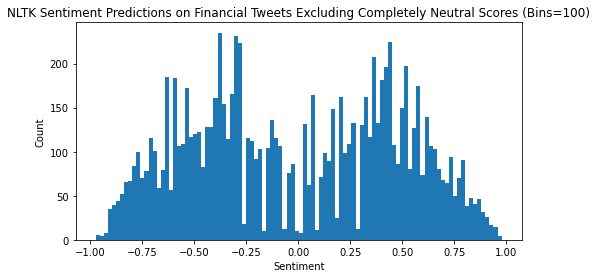

In [107]:
import database.fetch as fetch
import load
tweet_df = fetch.fetch_tweets().drop(columns="tweet_id")
tweet_df = load.remove_neutral_sentiment(tweet_df).drop(columns=['is_quoted', 'quoted_id', 'flair_w_urls', 'flair', 'text'])
bins = 100
model = 'nltk'
plot_sentiment_count(tweet_df, model, bins, "NLTK Sentiment Predictions on Financial Tweets Excluding Completely Neutral Scores")

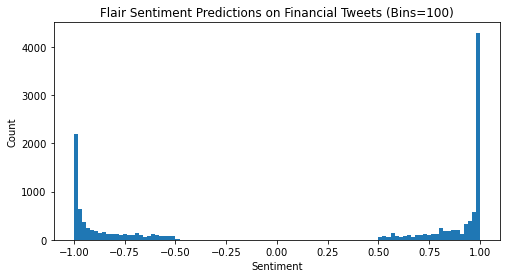

In [33]:
import database.fetch as fetch
tweet_df = fetch.fetch_tweets().drop(columns="tweet_id")
bins = 100
model = 'flair'
plot_sentiment_count(tweet_df, model, bins, "Flair Sentiment Predictions on Financial Tweets")

As we can see in the figures above, the nltk model seems to have a massive bias towards labeling tweets as neutral sentiment. On the other hand, the flair model has a bias towards sentiment polarity and quite clearly refuses to label any tweet with neutral sentiment.

What is especially upsetting about the performance of both models on our tweets is that given current events surround the Covid-19 epidemic, one would expect that the sentiment expressed on twitter would be generally negative. Below are some example tweets and their predicted sentiments. #TODO include that google sheet table "interesting tweets"

We see that by excluding tweets with a sentiment score of zero, the nltk produces a bimodal distribution of sentiment prediction.

# looking at average sentiment by groups over time

In [96]:
def plot_sentiment_count2(tweet_df, model, title, group):
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib.ticker as ticker
    import common.dates as dates


    
    data = tweet_df.loc[:,model]
    data = dates.group_data(tweet_df, [model], method='avg', group=group)

    #print(data.head())
    fig, ax = plt.subplots(ncols=1, figsize=(8, 4))
    
    ax.plot(data)
    ax.set_title(title + " (Group=" + group[:-1] + "minutes) (npoints=" + str(len(data)) + ")")
    ax.set_ylabel("Avg Sentiment per " + group[:-1] + " minutes")
    ax.set_xlabel("Date")
    
    plt.show()

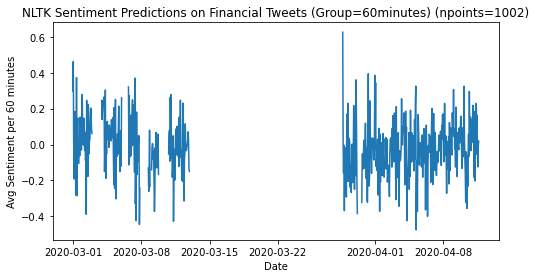

In [97]:
import database.fetch as fetch
import load
model = 'nltk'
group = "60T"
tweet_df = fetch.fetch_tweets().drop(columns="tweet_id")
tweet_df = load.remove_neutral_sentiment(tweet_df).drop(columns=['is_quoted', 'quoted_id', 'flair_w_urls', 'flair', 'text'])
plot_sentiment_count2(tweet_df, model, "NLTK Sentiment Predictions on Financial Tweets", group)

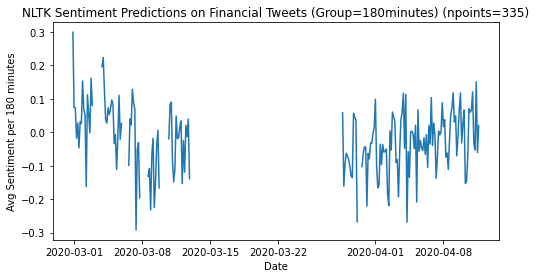

In [98]:
import database.fetch as fetch
import load
model = 'nltk'
group = "180T"
tweet_df = fetch.fetch_tweets().drop(columns="tweet_id")
tweet_df = load.remove_neutral_sentiment(tweet_df).drop(columns=['is_quoted', 'quoted_id', 'flair_w_urls', 'flair', 'text'])
plot_sentiment_count2(tweet_df, model, "NLTK Sentiment Predictions on Financial Tweets", group)

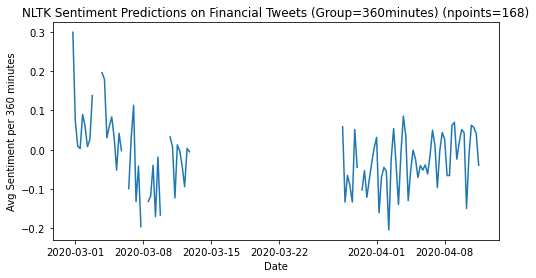

In [99]:
import database.fetch as fetch
import load
model = 'nltk'
group = "360T"
tweet_df = fetch.fetch_tweets().drop(columns="tweet_id")
tweet_df = load.remove_neutral_sentiment(tweet_df).drop(columns=['is_quoted', 'quoted_id', 'flair_w_urls', 'flair', 'text'])
plot_sentiment_count2(tweet_df, model, "NLTK Sentiment Predictions on Financial Tweets", group)

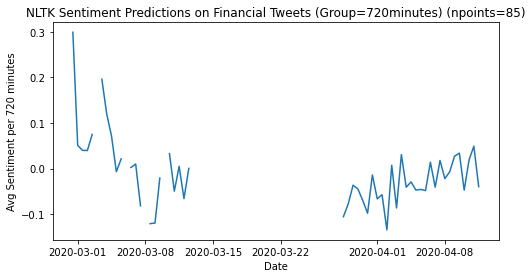

In [100]:
import database.fetch as fetch
import load
model = 'nltk'
group = "720T"
tweet_df = fetch.fetch_tweets().drop(columns="tweet_id")
tweet_df = load.remove_neutral_sentiment(tweet_df).drop(columns=['is_quoted', 'quoted_id', 'flair_w_urls', 'flair', 'text'])
plot_sentiment_count2(tweet_df, model, "NLTK Sentiment Predictions on Financial Tweets", group)

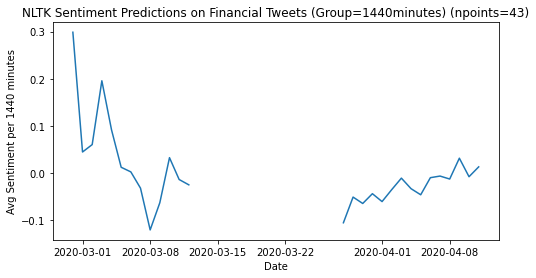

In [101]:
import database.fetch as fetch
import load
model = 'nltk'
group = "1440T"
tweet_df = fetch.fetch_tweets().drop(columns="tweet_id")
tweet_df = load.remove_neutral_sentiment(tweet_df).drop(columns=['is_quoted', 'quoted_id', 'flair_w_urls', 'flair', 'text'])
plot_sentiment_count2(tweet_df, model, "NLTK Sentiment Predictions on Financial Tweets", group)

# Looking at flair now

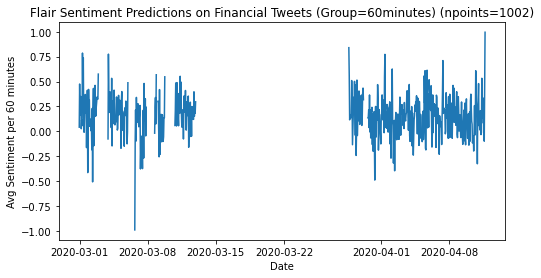

In [102]:
import database.fetch as fetch
import load
model = 'flair'
group = "60T"
tweet_df = fetch.fetch_tweets().drop(columns="tweet_id")
plot_sentiment_count2(tweet_df, model, "Flair Sentiment Predictions on Financial Tweets", group)

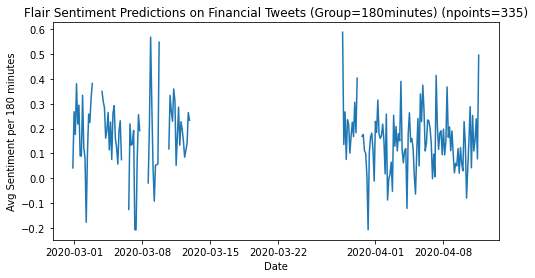

In [103]:
import database.fetch as fetch
import load
model = 'flair'
group = "180T"
tweet_df = fetch.fetch_tweets().drop(columns="tweet_id")
plot_sentiment_count2(tweet_df, model, "Flair Sentiment Predictions on Financial Tweets", group)

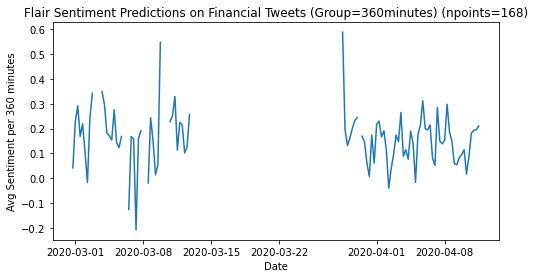

In [104]:
import database.fetch as fetch
import load
model = 'flair'
group = "360T"
tweet_df = fetch.fetch_tweets().drop(columns="tweet_id")
plot_sentiment_count2(tweet_df, model, "Flair Sentiment Predictions on Financial Tweets", group)

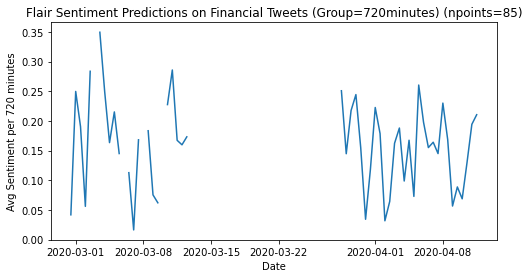

In [105]:
import database.fetch as fetch
import load
model = 'flair'
group = "720T"
tweet_df = fetch.fetch_tweets().drop(columns="tweet_id")
plot_sentiment_count2(tweet_df, model, "Flair Sentiment Predictions on Financial Tweets", group)

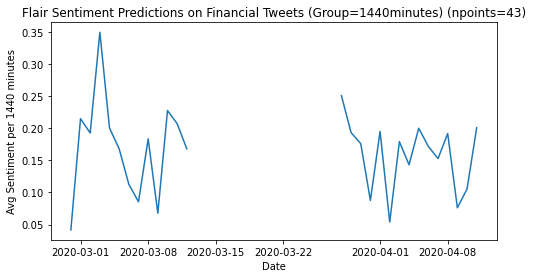

In [106]:
import database.fetch as fetch
import load
model = 'flair'
group = "1440T"
tweet_df = fetch.fetch_tweets().drop(columns="tweet_id")
plot_sentiment_count2(tweet_df, model, "Flair Sentiment Predictions on Financial Tweets", group)

## Looking at SPX vs Sentiment

In [16]:
from corelation import CorMatrix
import load

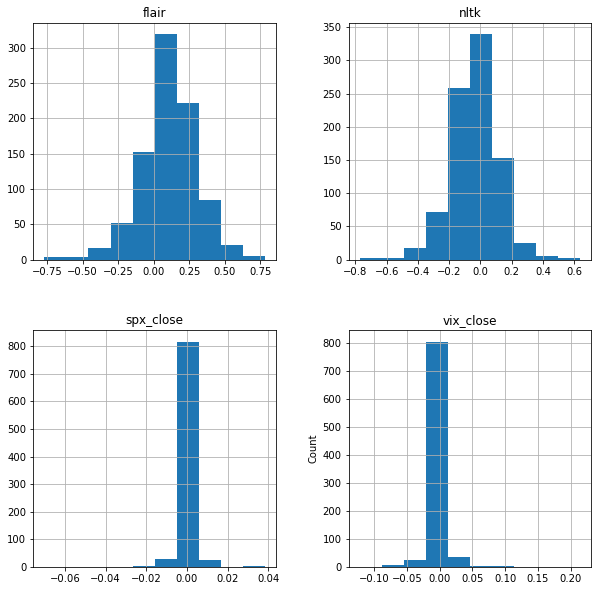

In [64]:
import matplotlib.pyplot as plt
group='30T'
delta=15

vix_df, spx_df, tweet_df = load.prepare_data(remove_neutral_sent=True)
co = CorMatrix(vix_df, spx_df, tweet_df)
co.shift_spx_by_delta(delta)
co.shift_vix_by_delta(delta)
co.group_data(group)
data = co.prepare_data()
data=data.dropna()
data.hist(figsize=(10,10))
#fig = ax.get_figure()
#plt.title("Datapoints after Grouping (Group=)"+str(group)+", Delta="+str(delta)+")")
plt.xlabel=("Avg Sentiment / Close Price Percent Diff")
plt.ylabel("Count")
plt.savefig("writeup\\raw_hists.png")
#plt.savefig('path/to/figure.pdf') 

# Corelation stuff

In [3]:

def plot_price_vs_sent(data, stock, model, delta, group, a=.3):
    x = data[model]
    y = data[stock]
    
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8, 4))
    
    ax.scatter(x,y, alpha=a)
    #ax.plot(tuple([t for t in reversed(ax.get_xlim())]), ax.get_ylim(), ls="--", c=".3")
    ax.set_xlabel(model + " Weighted Sentiment Score")
    ax.set_ylabel(stock+ " Pct Change")
    ax.set_title(model + " Sentiment Score vs " + stock + " Close Price Pct Change (Delta=" + str(delta) + ") (Group=" + str(group) + ")" + " (npoints="+str(len(y)) + ")")
    #plt.show()
    return fig, ax



In [4]:
import load
from corelation import CorMatrix
group='360T'
delta=120
stock = "spx_close"
model = 'nltk'

deltas1 = list(range(0,4320,30))
for group in ['60T', '180T', "360T", "720T", "1440T"]:
        g = int(int(group[:-1])/30)
        if group == "1440T":
            deltas = [deltas1[g*i] for i in range(3)]
        else:
            deltas = [deltas1[g*i] for i in range(6)]
        for delta in deltas:
    

            vix_df, spx_df, tweet_df = load.prepare_data(remove_neutral_sent=True)
            co = CorMatrix(vix_df, spx_df, tweet_df)
            co.shift_spx_by_delta(delta)
            co.shift_vix_by_delta(delta)
            co.group_data(group)
            data = co.prepare_data()
            data=data.dropna()


            fig, ax = plot_price_vs_sent(data, stock, model, delta, group)
            plt.show()

#fig.savefig("writeup\\validateSentiment_"+str(group)+"_"+str(delta)+".png")

ModuleNotFoundError: No module named 'corelation'

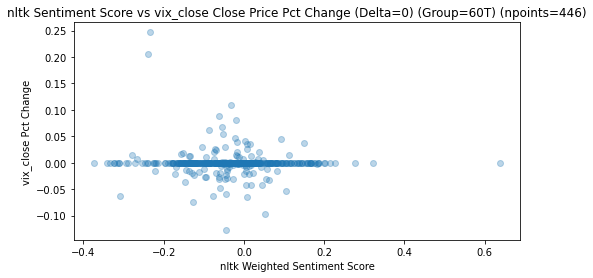

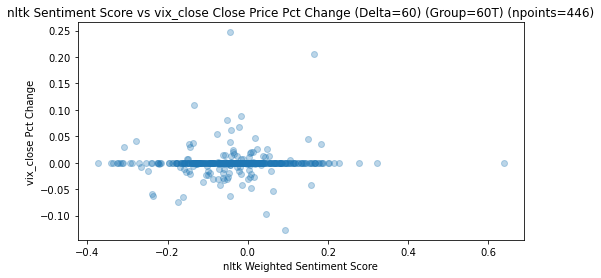

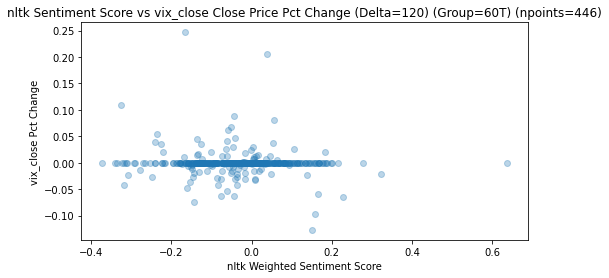

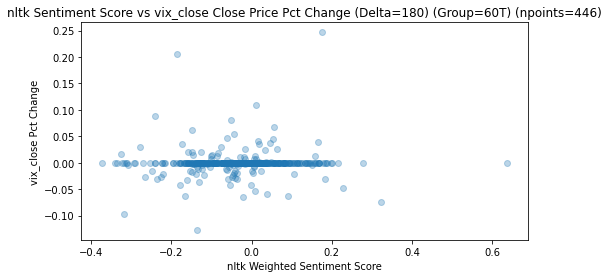

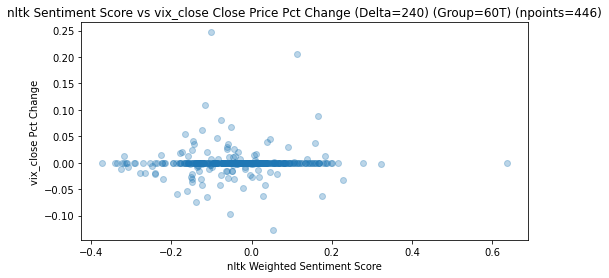

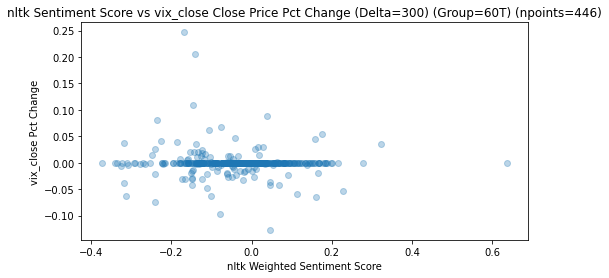

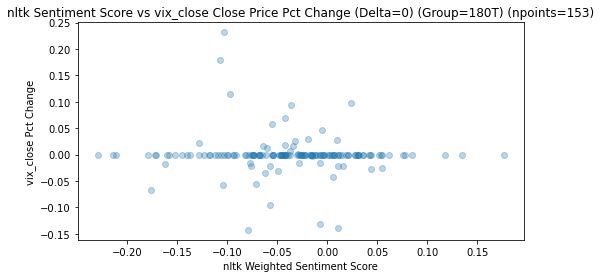

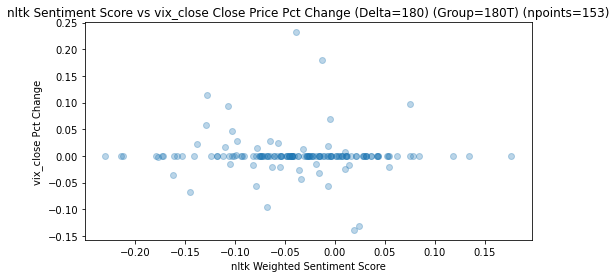

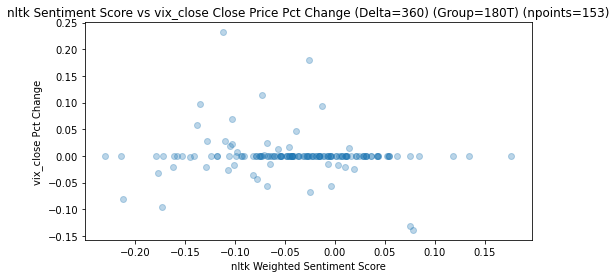

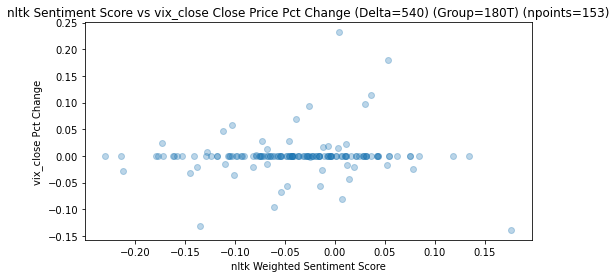

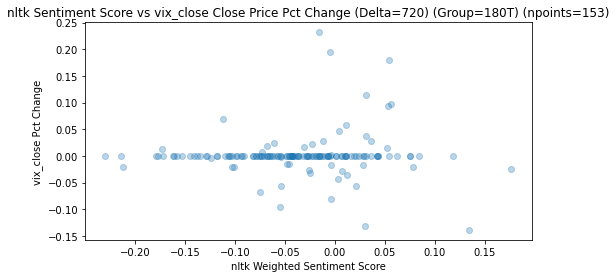

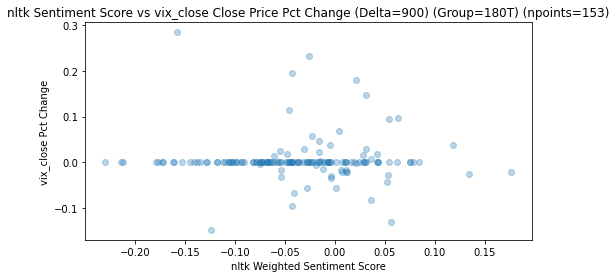

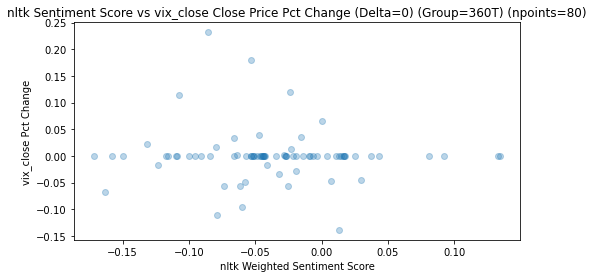

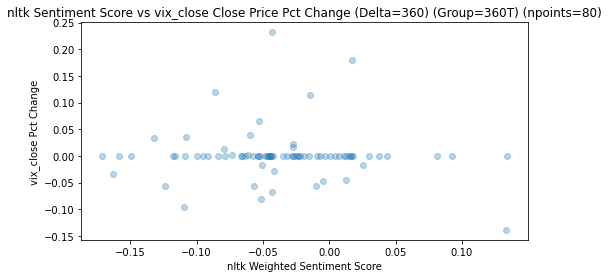

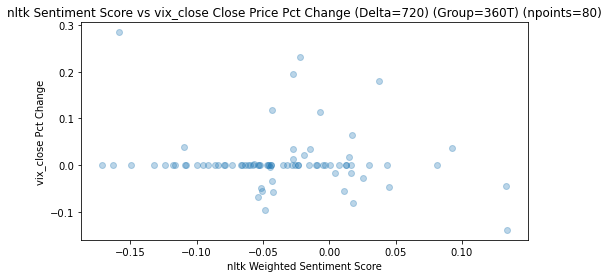

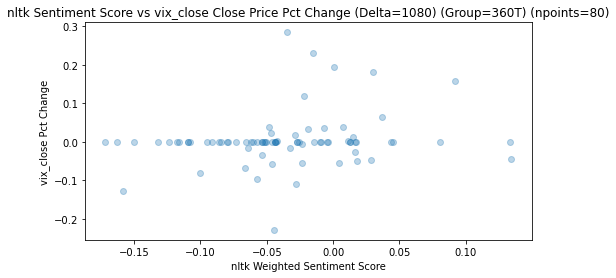

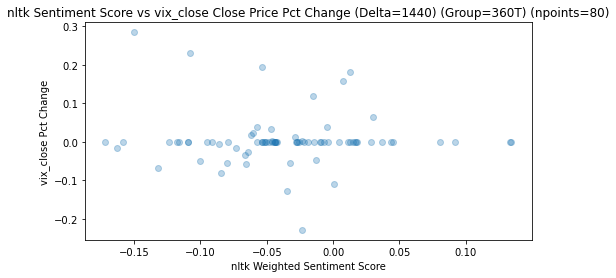

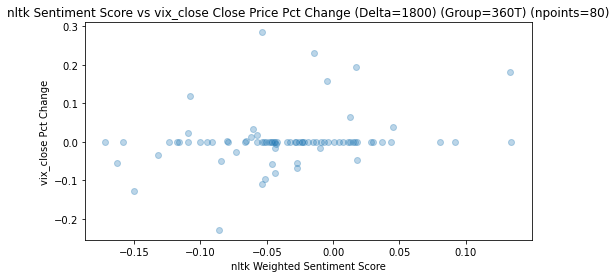

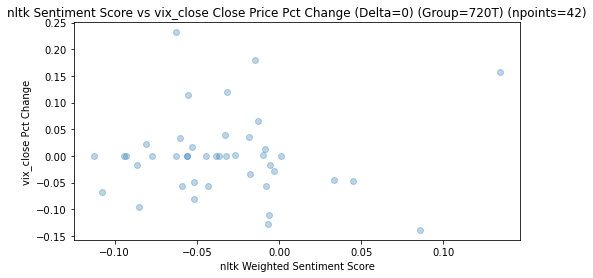

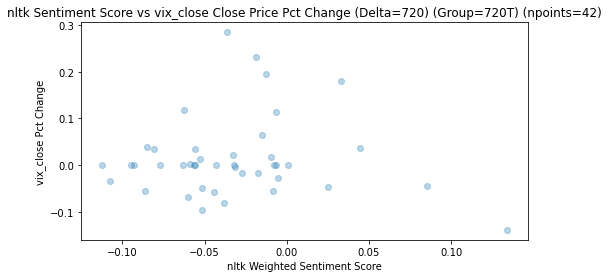

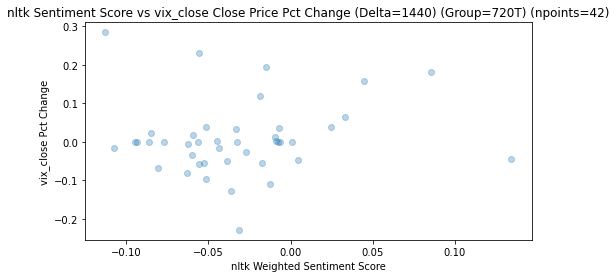

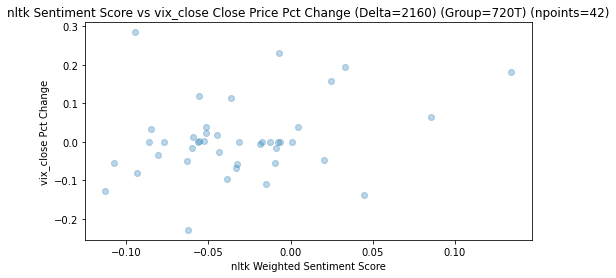

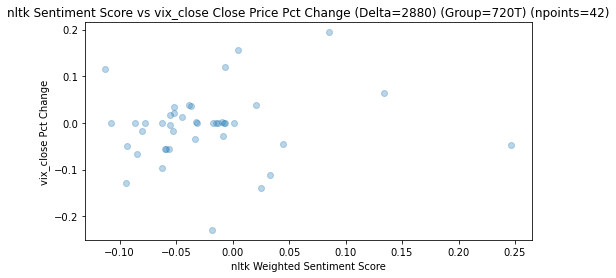

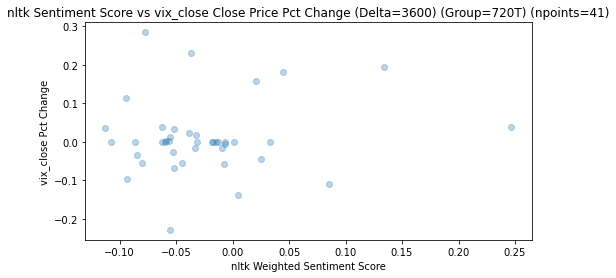

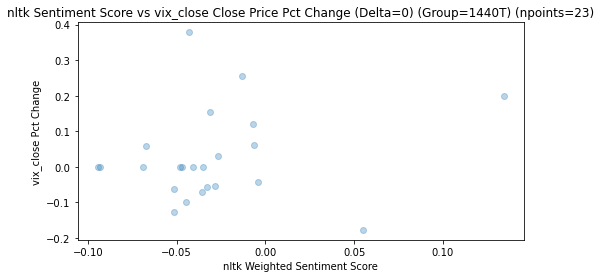

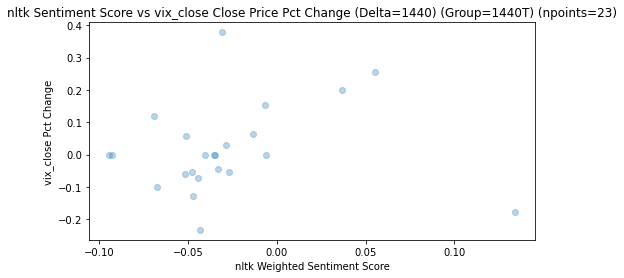

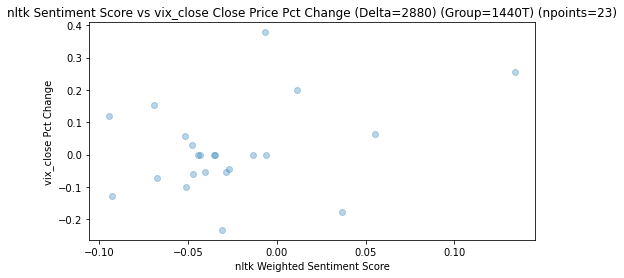

In [6]:
import load
from correlation import CorMatrix
import matplotlib.pyplot as plt
group='360T'
delta=1900
stock = "vix_close"
model = 'nltk'

deltas1 = list(range(0,4320,30))
for group in ['60T', '180T', "360T", "720T", "1440T"]:
        g = int(int(group[:-1])/30)
        if group == "1440T":
            deltas = [deltas1[g*i] for i in range(3)]
        else:
            deltas = [deltas1[g*i] for i in range(6)]
        for delta in deltas:
    

            vix_df, spx_df, tweet_df = load.prepare_data(remove_neutral_sent=True)
            co = CorMatrix(vix_df, spx_df, tweet_df)
            co.shift_spx_by_delta(delta)
            co.shift_vix_by_delta(delta)
            co.group_data(group)
            data = co.prepare_data()
            data=data.dropna()


            fig, ax = plot_price_vs_sent(data, stock, model, delta, group)
            plt.show()

#fig.savefig("writeup\\validateSentiment_"+str(group)+"_"+str(delta)+".png")

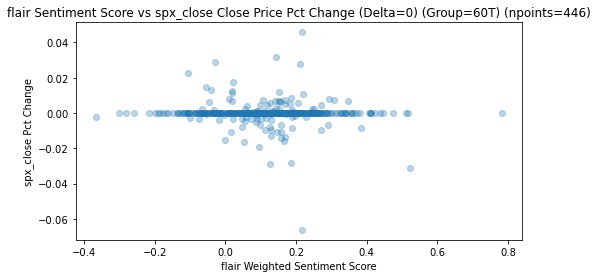

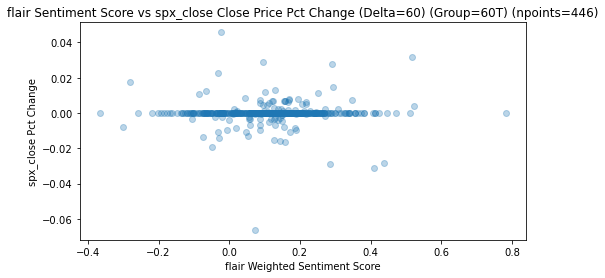

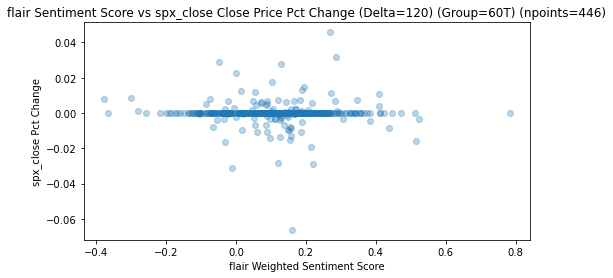

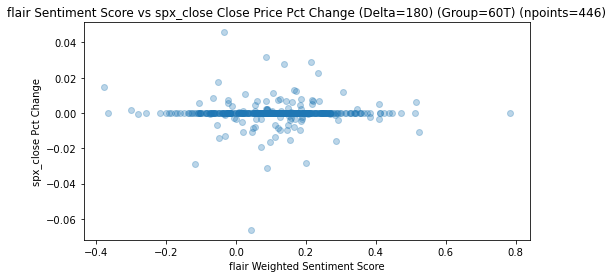

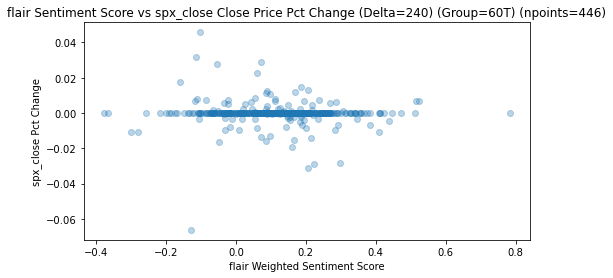

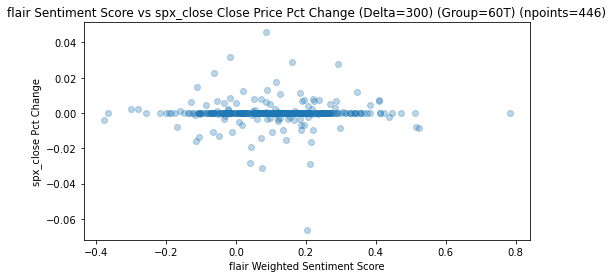

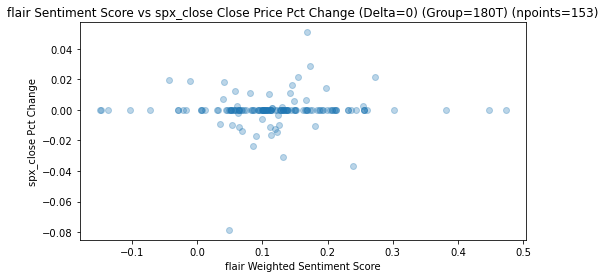

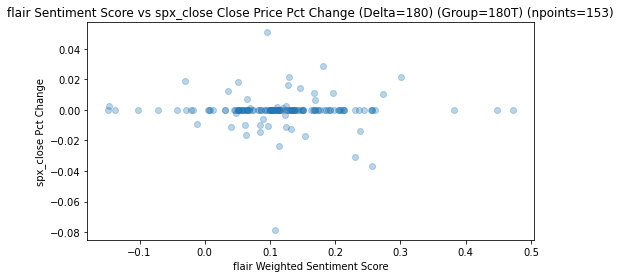

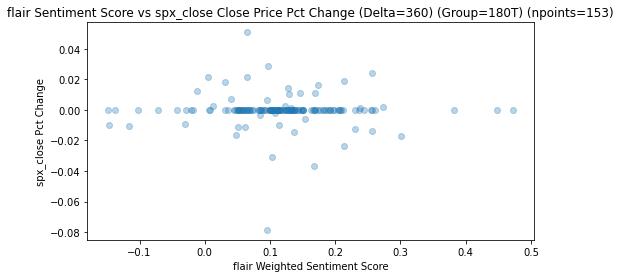

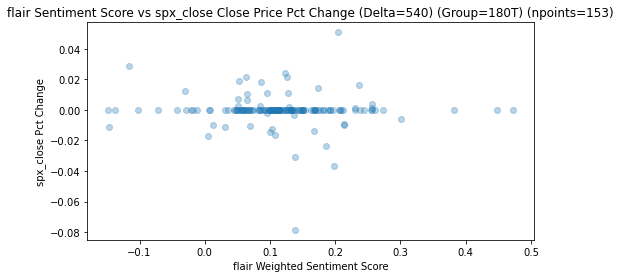

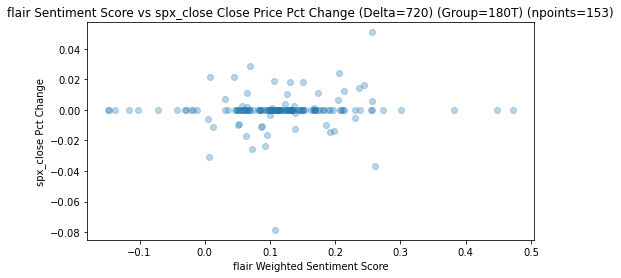

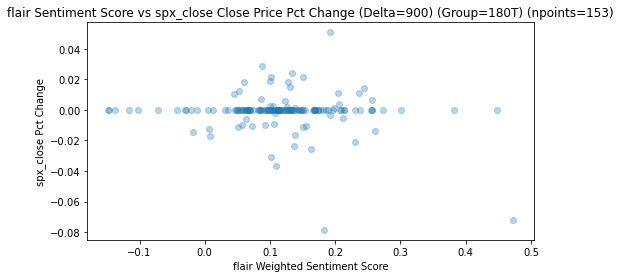

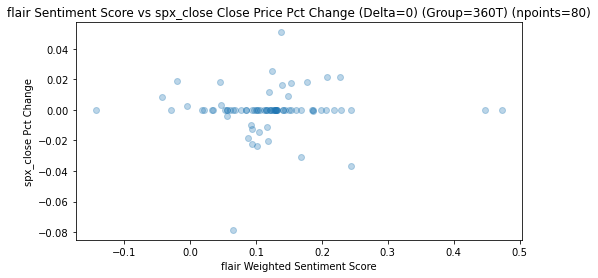

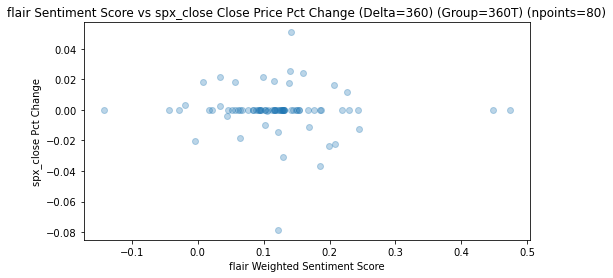

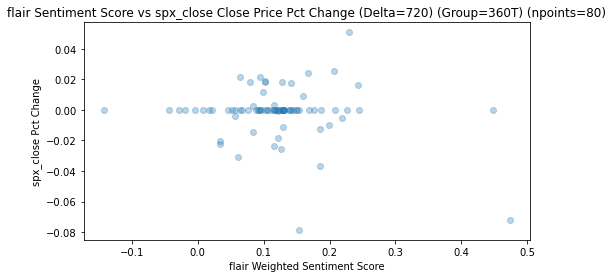

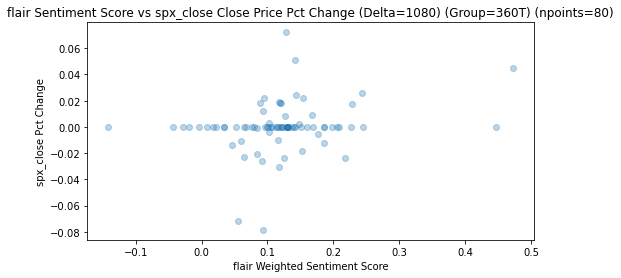

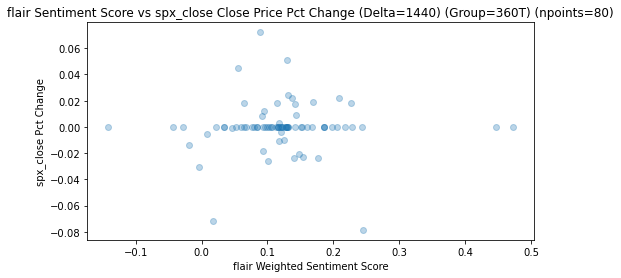

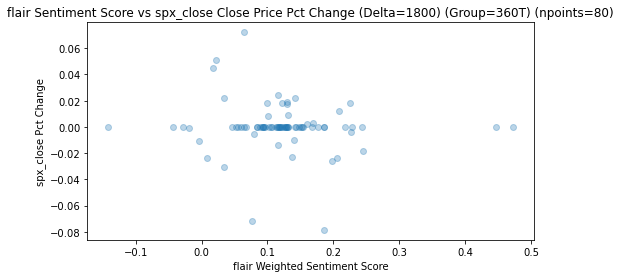

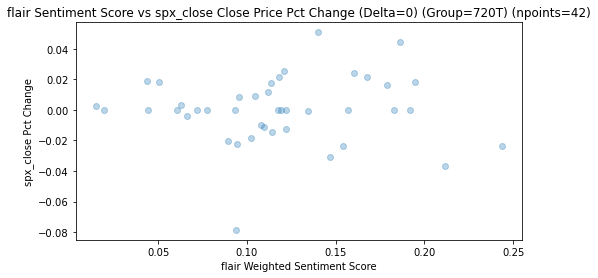

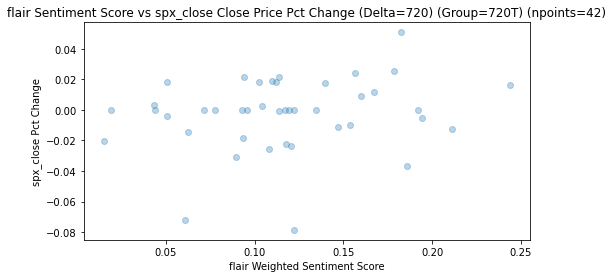

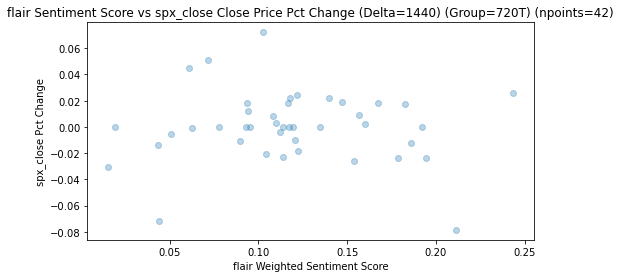

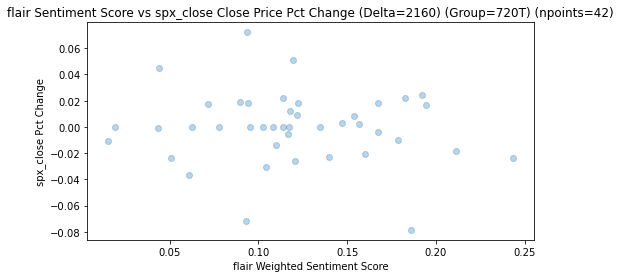

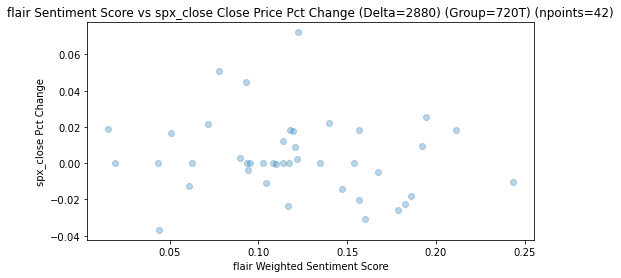

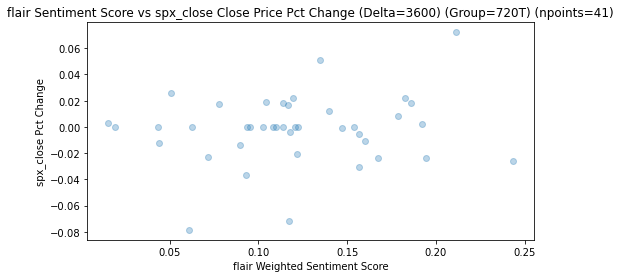

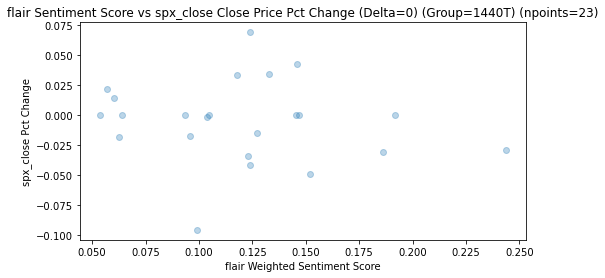

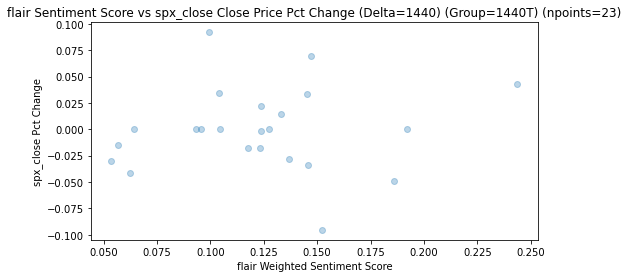

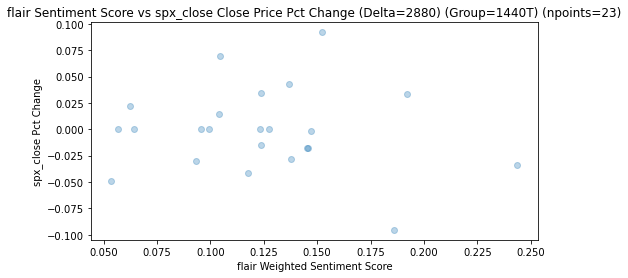

In [127]:
import load
from corelation import CorMatrix
group='360T'
delta=120
stock = "spx_close"
model = 'flair'

deltas1 = list(range(0,4320,30))
for group in ['60T', '180T', "360T", "720T", "1440T"]:
        g = int(int(group[:-1])/30)
        if group == "1440T":
            deltas = [deltas1[g*i] for i in range(3)]
        else:
            deltas = [deltas1[g*i] for i in range(6)]
        for delta in deltas:
    

            vix_df, spx_df, tweet_df = load.prepare_data(remove_neutral_sent=True)
            co = CorMatrix(vix_df, spx_df, tweet_df)
            co.shift_spx_by_delta(delta)
            co.shift_vix_by_delta(delta)
            co.group_data(group)
            data = co.prepare_data()
            data=data.dropna()


            fig, ax = plot_price_vs_sent(data, stock, model, delta, group)
            plt.show()

#fig.savefig("writeup\\validateSentiment_"+str(group)+"_"+str(delta)+".png")

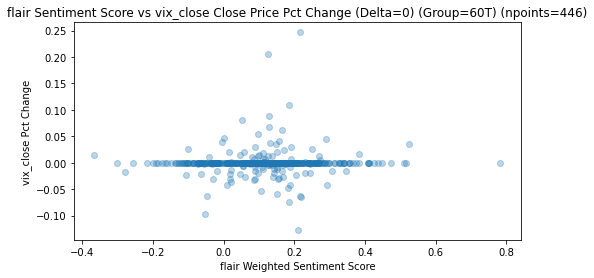

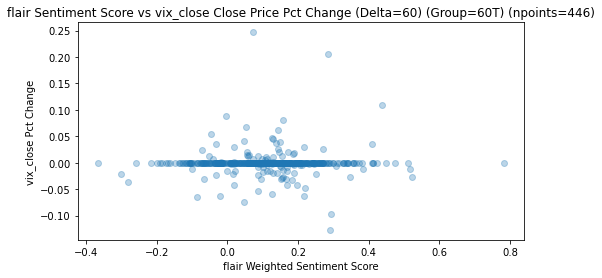

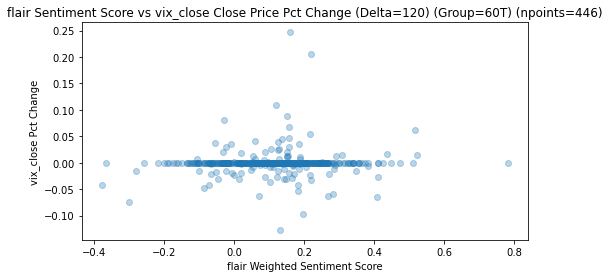

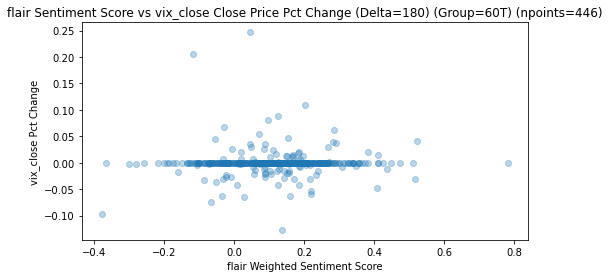

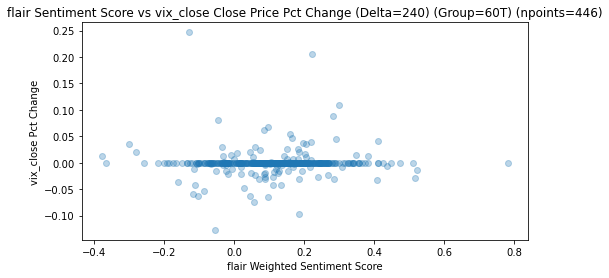

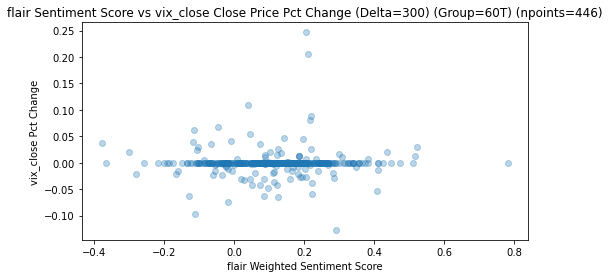

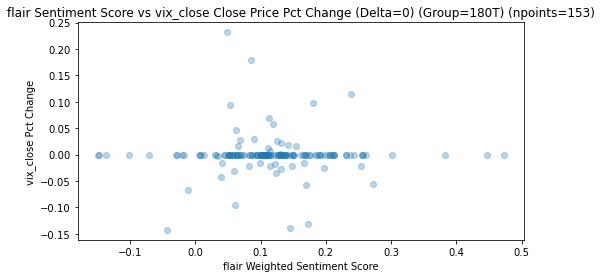

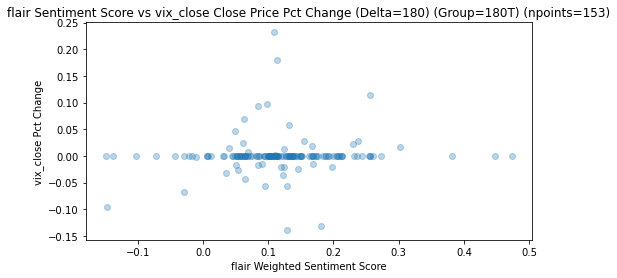

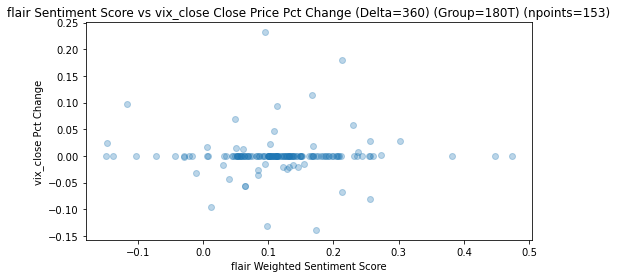

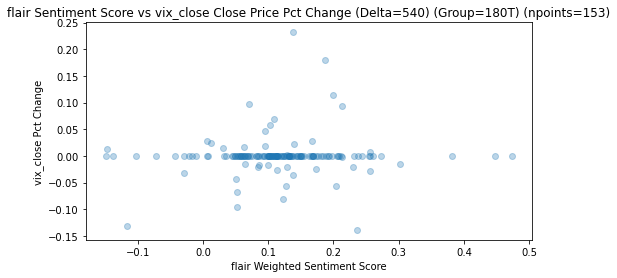

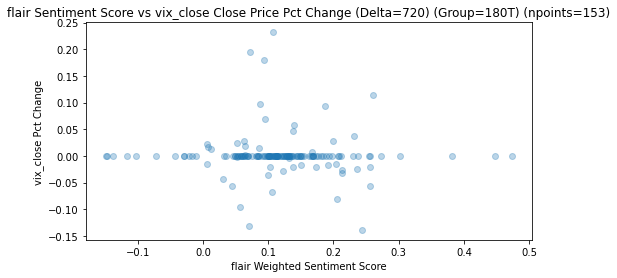

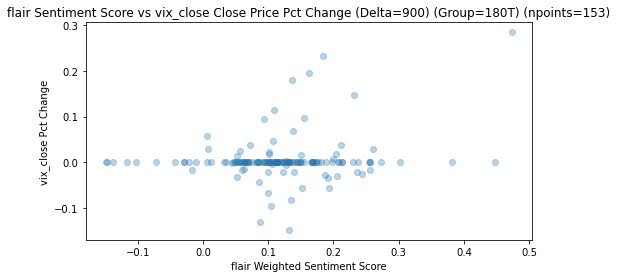

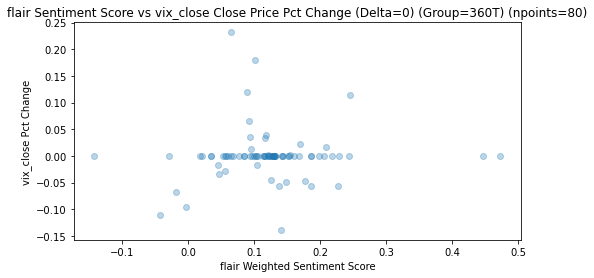

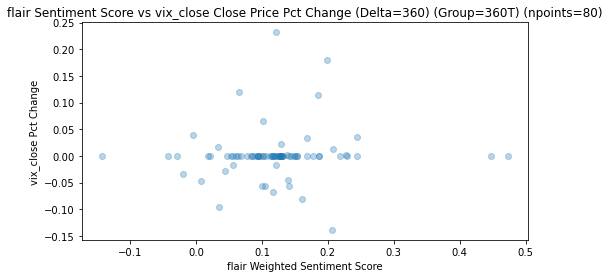

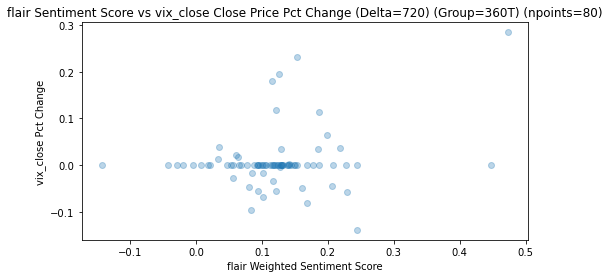

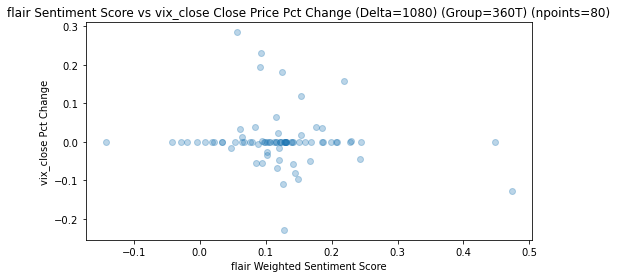

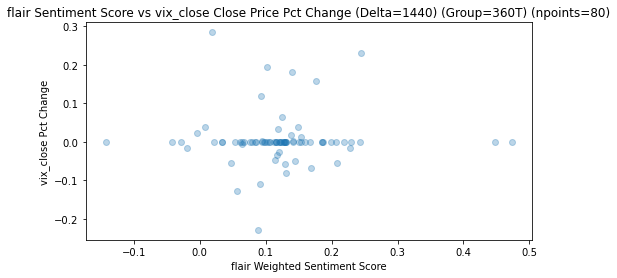

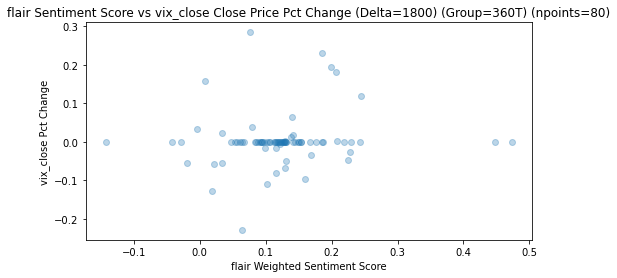

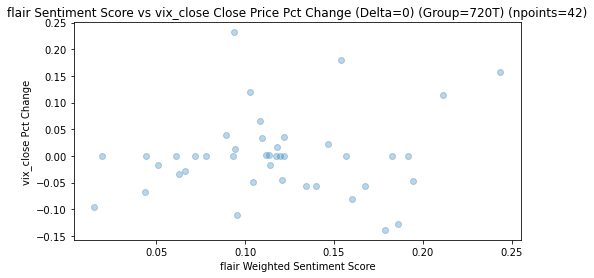

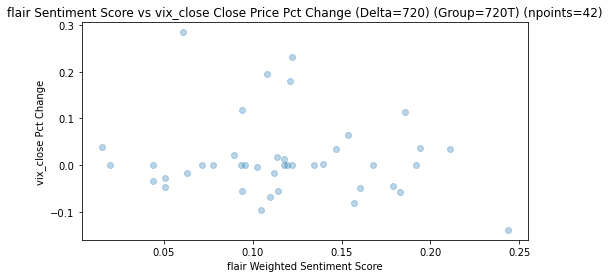

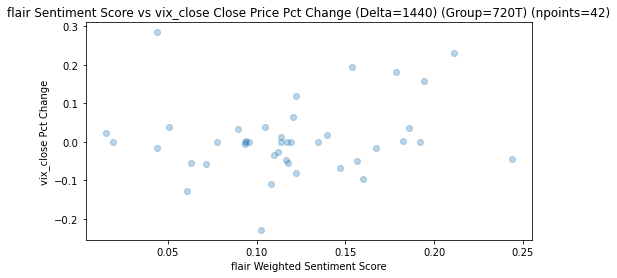

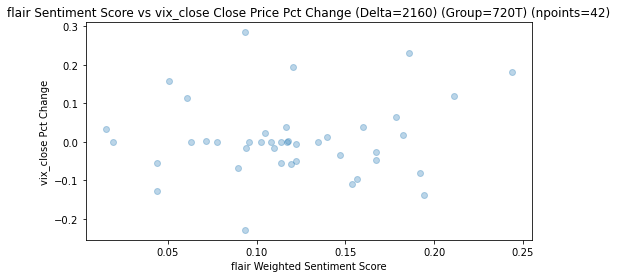

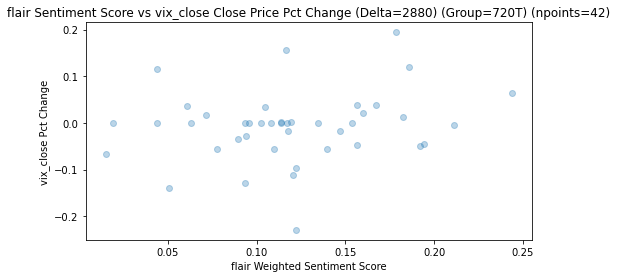

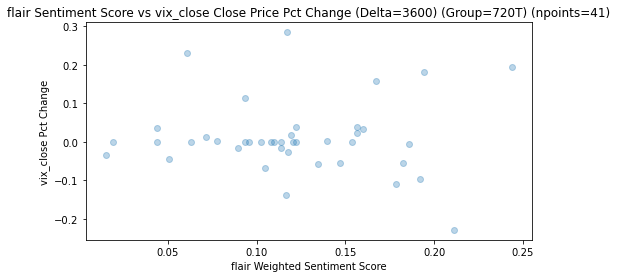

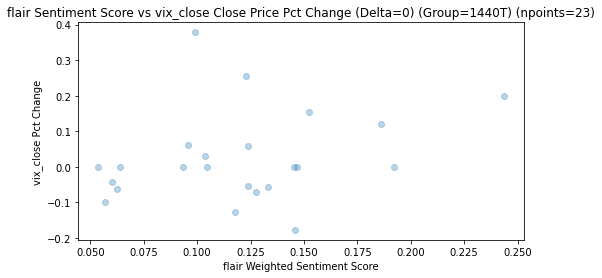

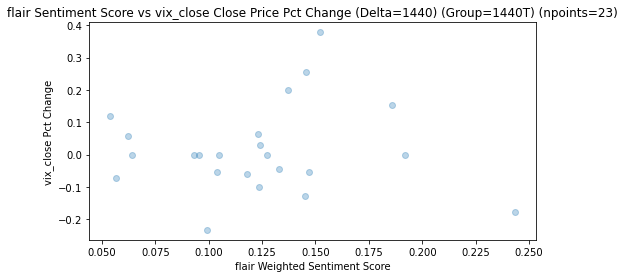

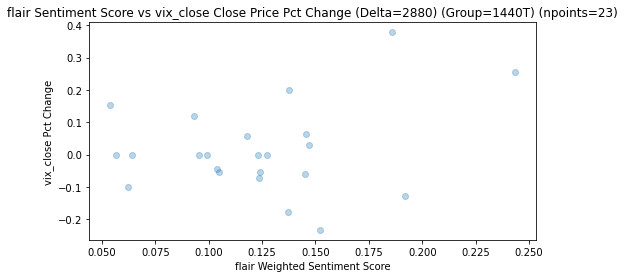

In [128]:
import load
from corelation import CorMatrix
group='360T'
delta=120
stock = "vix_close"
model = 'flair'

deltas1 = list(range(0,4320,30))
for group in ['60T', '180T', "360T", "720T", "1440T"]:
        g = int(int(group[:-1])/30)
        if group == "1440T":
            deltas = [deltas1[g*i] for i in range(3)]
        else:
            deltas = [deltas1[g*i] for i in range(6)]
        for delta in deltas:
    

            vix_df, spx_df, tweet_df = load.prepare_data(remove_neutral_sent=True)
            co = CorMatrix(vix_df, spx_df, tweet_df)
            co.shift_spx_by_delta(delta)
            co.shift_vix_by_delta(delta)
            co.group_data(group)
            data = co.prepare_data()
            data=data.dropna()


            fig, ax = plot_price_vs_sent(data, stock, model, delta, group)
            plt.show()

#fig.savefig("writeup\\validateSentiment_"+str(group)+"_"+str(delta)+".png")

## Looking at the size of the data
1. Who was posting the most tweets
1. how many datapoints with large groupings?

In [65]:
450+1694+342

2486

In [66]:
1000/1200

0.8333333333333334

# plotting finance and sentiment same graph

In [202]:
def plot_sent_fin_time(data, stock, model, title, group='1440T'):
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib.ticker as ticker
    import common.dates as dates
    
    # adapted from matplotlib tutorial
    def format_date(x, pos=None):
        thisind = np.clip(int(x + 0.5), 0, N - 1)
        return date[thisind].strftime('%Y-%m-%d')
    

    
    #data = dates.group_data(data, ['close'], method='lastValue', group=group)
    #data = data.set_index('datetime', drop=False)
    #remove NaT values
    data['datetime'] = data.index
    data = data[data['datetime'].notnull()]

    fig, ax = plt.subplots(ncols=1, figsize=(8, 4))
    
    
    date = data['datetime'].astype('O')
    #index_df['close'] = index_df['close'].pct_change()
    #index_df = index_df.dropna()
    N = len(data)
    ind = np.arange(N)  # the evenly spaced plot indices
    ax.plot(ind, data['vix_close'], label=str('VIX Close Pct Change'), color='r')
    ax.plot(ind, data['spx_close'], label=str('SPX Close Pct Change'), color='g')
    ax.plot(ind, data['nltk'], 'b:', label=str('nltk'))
    ax.plot(ind, data['flair'], 'm:', label=str('flair'))
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
    ax.set_title(title + " (Group=" + group[:-1]+"minutes)"+ " (Delta="+str(delta)+")"+" (npoints= " + str(len(data)) + ")")
    ax.set_xlabel("Date")
    #ax.legend()
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    ax.set_ylabel("Close Price Pct Change/Sentiment Average")
    #ax.set_ylim([-.3,.3])
    fig.autofmt_xdate()
    
    plt.show()

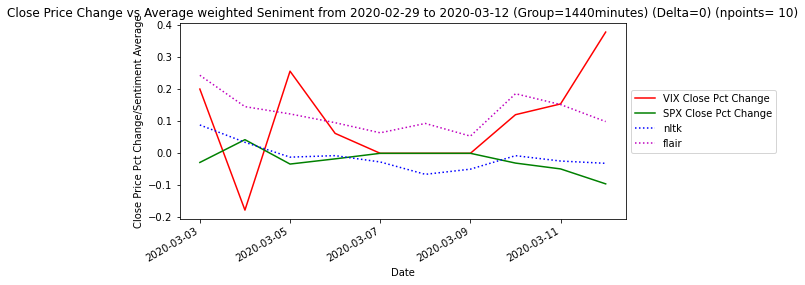

In [203]:
import database.fetch as fetch
from corelation import CorMatrix
import load

group = "1440T"
delta = 0
title = "Close Price Change vs Average weighted Seniment from 2020-02-29 to 2020-03-12"


vix_df, spx_df, tweet_df = load.prepare_data(remove_neutral_sent=False)
tweet_df = tweet_df.loc[tweet_df['datetime'] < '2020-03-28']
co = CorMatrix(vix_df, spx_df, tweet_df)
co.shift_spx_by_delta(delta)
co.shift_vix_by_delta(delta)
co.group_data(group)
co.data = co.prepare_data()
co.data = co.data.dropna()
plot_sent_fin_time(co.data, 'spx_close', 'nltk', title)

#plot_finance(spx_df, title, "1440")

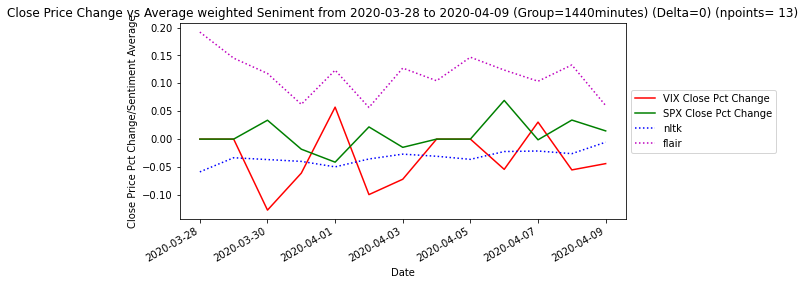

In [205]:
import database.fetch as fetch
from corelation import CorMatrix
import load

group = "1440T"
delta = 0
title = "Close Price Change vs Average weighted Seniment from 2020-03-28 to 2020-04-09"


vix_df, spx_df, tweet_df = load.prepare_data(remove_neutral_sent=False)
tweet_df = tweet_df.loc[tweet_df['datetime'] >= '2020-03-28']
co = CorMatrix(vix_df, spx_df, tweet_df)
co.shift_spx_by_delta(delta)
co.shift_vix_by_delta(delta)
co.group_data(group)
co.data = co.prepare_data()
co.data = co.data.dropna()
plot_sent_fin_time(co.data, 'spx_close', 'nltk', title)

#plot_finance(spx_df, title, "1440")

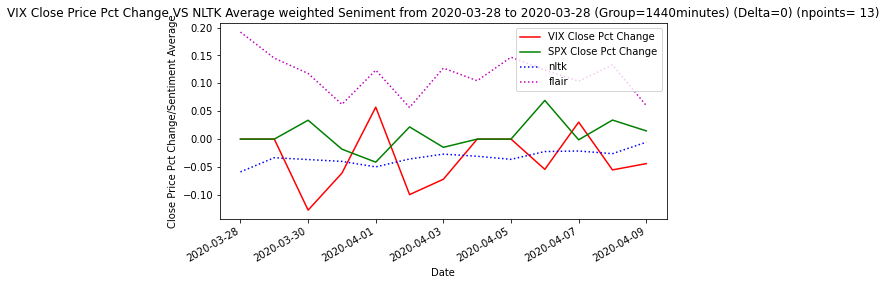

In [189]:
import database.fetch as fetch
from corelation import CorMatrix
import load

group = "1440T"
delta = 0
title = "VIX Close Price Pct Change VS NLTK Average weighted Seniment from 2020-03-28 to 2020-03-28"


vix_df, spx_df, tweet_df = load.prepare_data(remove_neutral_sent=False)
tweet_df = tweet_df.loc[tweet_df['datetime'] >= '2020-03-28']
co = CorMatrix(vix_df, spx_df, tweet_df)
co.shift_spx_by_delta(delta)
co.shift_vix_by_delta(delta)
co.group_data(group)
co.data = co.prepare_data()
co.data = co.data.dropna()
plot_sent_fin_time(co.data, 'vix_close', 'nltk', title)

#plot_finance(spx_df, title, "1440")